# Scale Invariant Feature Transform（SIFT）

## 图像尺度空间

在一定的范围内，无论物体是大还是小，人眼都可以分辨出来，然而计算机要有相同的能力却很难，所以要让机器能够对物体在不同尺度下有一个统一的认知，就需要考虑图像在不同的尺度下都存在的特点。

尺度空间的获取通常使用高斯模糊来实现

![title](sift_3.png)

![title](sift_2.png)

不同σ的高斯函数决定了对图像的平滑程度，越大的σ值对应的图像越模糊。

### 多分辨率金字塔


![title](sift_4.png)

### 高斯差分金字塔（DOG）

![title](sift_5.png)

![title](sift_6.png)

### DoG空间极值检测

为了寻找尺度空间的极值点，每个像素点要和其图像域（同一尺度空间）和尺度域（相邻的尺度空间）的所有相邻点进行比较，当其大于（或者小于）所有相邻点时，该点就是极值点。如下图所示，中间的检测点要和其所在图像的3×3邻域8个像素点，以及其相邻的上下两层的3×3领域18个像素点，共26个像素点进行比较。


![title](sift_7.png)

### 关键点的精确定位


这些候选关键点是DOG空间的局部极值点，而且这些极值点均为离散的点，精确定位极值点的一种方法是，对尺度空间DoG函数进行曲线拟合，计算其极值点，从而实现关键点的精确定位。

![title](sift_8.png)

![title](sift_9.png)

### 消除边界响应

![title](sift_10.png)

### 特征点的主方向

![title](sift_11.png)

每个特征点可以得到三个信息(x,y,σ,θ)，即位置、尺度和方向。具有多个方向的关键点可以被复制成多份，然后将方向值分别赋给复制后的特征点，一个特征点就产生了多个坐标、尺度相等，但是方向不同的特征点。

### 生成特征描述

在完成关键点的梯度计算后，使用直方图统计邻域内像素的梯度和方向。

![title](sift_12.png)

为了保证特征矢量的旋转不变性，要以特征点为中心，在附近邻域内将坐标轴旋转θ角度，即将坐标轴旋转为特征点的主方向。

![title](sift_14.png)

旋转之后的主方向为中心取8x8的窗口，求每个像素的梯度幅值和方向，箭头方向代表梯度方向，长度代表梯度幅值，然后利用高斯窗口对其进行加权运算，最后在每个4x4的小块上绘制8个方向的梯度直方图，计算每个梯度方向的累加值，即可形成一个种子点，即每个特征的由4个种子点组成，每个种子点有8个方向的向量信息。

![title](sift_16.png)

论文中建议对每个关键点使用4x4共16个种子点来描述，这样一个关键点就会产生128维的SIFT特征向量。 

![title](sift_17.png)

### opencv SIFT函数

In [2]:
import cv2
import numpy as np

img = cv2.imread('test_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [18]:
cv2.__version__ #3.4.1.15 pip install opencv-python==3.4.1.15 pip install opencv-contrib-python==3.4.1.15

'3.4.1'

得到特征点

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

[ WARN:0@5.250] global /opt/conda/conda-bld/opencv-suite_1664548337286/work/opencv_contrib-4.6.0/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


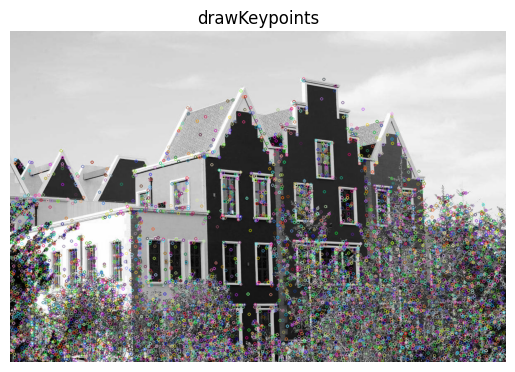

In [6]:
img = cv2.drawKeypoints(gray, kp, img)

from l_utils import plt_show_bgr
plt_show_bgr(img, 'drawKeypoints')

计算特征

In [7]:
kp, des = sift.compute(gray, kp)

In [8]:
print (np.array(kp).shape)

(6830,)


In [9]:
des.shape

(6830, 128)

In [10]:
des[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  21.,   8.,   0.,
         0.,   0.,   0.,   0.,   0., 157.,  31.,   3.,   1.,   0.,   0.,
         2.,  63.,  75.,   7.,  20.,  35.,  31.,  74.,  23.,  66.,   0.,
         0.,   1.,   3.,   4.,   1.,   0.,   0.,  76.,  15.,  13.,  27.,
         8.,   1.,   0.,   2., 157., 112.,  50.,  31.,   2.,   0.,   0.,
         9.,  49.,  42., 157., 157.,  12.,   4.,   1.,   5.,   1.,  13.,
         7.,  12.,  41.,   5.,   0.,   0., 104.,   8.,   5.,  19.,  53.,
         5.,   1.,  21., 157.,  55.,  35.,  90.,  22.,   0.,   0.,  18.,
         3.,   6.,  68., 157.,  52.,   0.,   0.,   0.,   7.,  34.,  10.,
        10.,  11.,   0.,   2.,   6.,  44.,   9.,   4.,   7.,  19.,   5.,
        14.,  26.,  37.,  28.,  32.,  92.,  16.,   2.,   3.,   4.,   0.,
         0.,   6.,  92.,  23.,   0.,   0.,   0.], dtype=float32)